## MNIST CNN

In [2]:
%matplotlib inline
from fastai.vision import *
from fastai import *

In [3]:
%reload_ext autoreload
%autoreload 2

### Data

In [5]:
URLs

fastai.datasets.URLs

In [6]:
URLs.MNIST

'https://s3.amazonaws.com/fast-ai-imageclas/mnist_png'

In [7]:
path = untar_data(URLs.MNIST)

In [ ]:
path.ls()

[PosixPath('/home/jhoward/.fastai/data/mnist_png/training'),
 PosixPath('/home/jhoward/.fastai/data/mnist_png/models'),
 PosixPath('/home/jhoward/.fastai/data/mnist_png/testing')]

In [8]:
il = ImageItemList.from_folder(path, convert_mode='L')

In [9]:
il.items[0]

PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/8/6327.png')

In [10]:
defaults.cmap

'viridis'

In [13]:
defaults.cmap='binary'

In [14]:
il

ImageItemList (70000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png

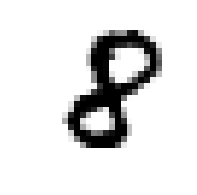

In [15]:
il[0].show()

In [16]:
sd = il.split_by_folder(train='training', valid='testing')

In [17]:
sd

ItemLists;

Train: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [18]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6')]

In [19]:
ll = sd.label_from_folder()

In [20]:
ll

LabelLists;

Train: LabelList
y: CategoryList (60000 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: /home/jupyter/.fastai/data/mnist_png
x: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: LabelList
y: CategoryList (10000 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: /home/jupyter/.fastai/data/mnist_png
x: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [21]:
x,y = ll.train[0]

In [22]:
x

In [23]:
y

Category 8

8 torch.Size([1, 28, 28])


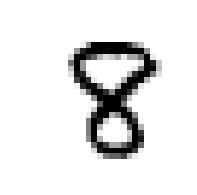

In [24]:
x.show()
print(y,x.shape)

In [26]:
doc(rand_pad)

In [30]:
without_ast = rand_pad(padding=3, size=28, mode='zeros')

In [31]:
without_ast

[RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 3, 'mode': 'zeros'}, p=1.0, resolved={}, do_run=True, is_random=True),
 RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True)]

In [32]:
with_ast= [*rand_pad(padding=3, size=28, mode='zeros')]

In [33]:
with_ast

[RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 3, 'mode': 'zeros'}, p=1.0, resolved={}, do_run=True, is_random=True),
 RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True)]

In [34]:
without_ast == with_ast

True

In [41]:
type(with_ast)

list

In [42]:
type(with_ast)

list

In [51]:
with_ast[1] == without_ast[1]

True

In [35]:
ll.transform??

In [52]:
tfms_without_ast = ([rand_pad(padding=3, size=28, mode='zeros')], [])

In [43]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [54]:
tfms_without_ast == tfms

False

In [61]:
tfms_without_ast[0]

[[RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 3, 'mode': 'zeros'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True)]]

In [62]:
tfms[0]

[RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 3, 'mode': 'zeros'}, p=1.0, resolved={'padding': 3, 'mode': 'zeros'}, do_run=True, is_random=True),
 RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={'size': 28, 'row_pct': 0.4865539553875545, 'col_pct': 0.9513638093389826}, do_run=True, is_random=True)]

In [ ]:
# by using * the list was flattened so only one level of list

In [44]:
ll = ll.transform(tfms)

In [45]:
bs = 128

In [46]:
# not using imagenet_stats because not using pretrained model
data = ll.databunch(bs=bs).normalize()

In [47]:
x,y = data.train_ds[0]

8


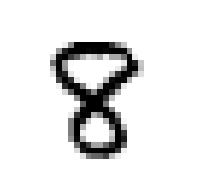

In [48]:
x.show()
print(y)

### Every time we call data.train_ds[0][0] the transformations are applied. So by plotting multi, we call a number of times and see different padding applied

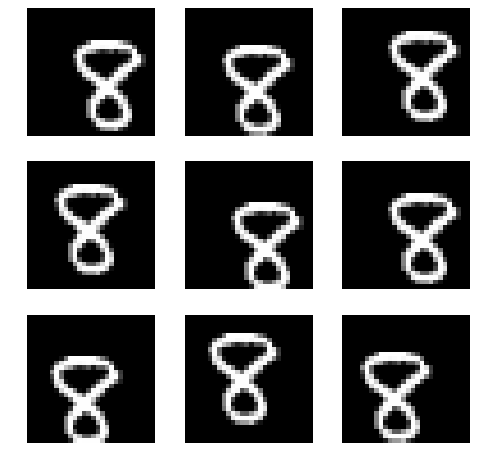

In [65]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [66]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

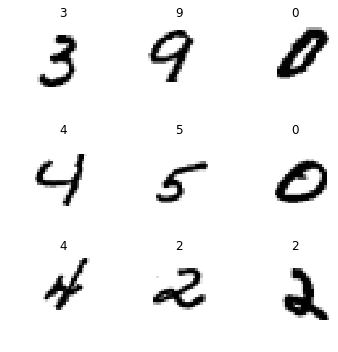

In [69]:
data.show_batch(rows=3, figsize=(5,5))

### Basic CNN with batchnorm

In [76]:
# ni --filter input to this layer (start with 1 and then depends on prior layer)
# nf -- number of filter output from the layer

def conv(ni,nf):
    return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [77]:
model = nn.Sequential(
    conv(1, 8), # 14 -- started with 28x28 images and have stride 2 so halved size (8x14x14)
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7 -- halved sized again
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4 -- halved but with a math.ciel
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1 -- we are now at a 10 x 1 x 1 tensor
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [72]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [73]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     80         True      
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
Conv2d               [128, 16, 7, 7]      1168       True      
______________________________________________________________________
BatchNorm2d          [128, 16, 7, 7]      32         True      
______________________________________________________________________
ReLU                 [128, 16, 7, 7]      0          False     
______________________________________________________________________
Conv2d               [128, 32, 4, 4]      4640       True      
______________________________________________________________

####  What determines the number of parameters per each layer:
    weights = (kernel width squared) x (number of kernels output) x (number of kernels input).
    biases = number of kernels output
    so for first conv2d, weights = 9 * 8 * 1 = 72, biases = 8, params = 80
    for last conv2d, weights = 9 * 10 * 16 = 1440, biases = 10, params = 1450
    for second to last conv2d, weights = 9 * 16 * 32 = 4608, biases = 16, params = 4624

In [79]:
nn.Conv2d??

In [80]:
xb = xb.cuda()

In [83]:
xb.shape

torch.Size([128, 1, 28, 28])

In [84]:
# model(xb).shape

In [85]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


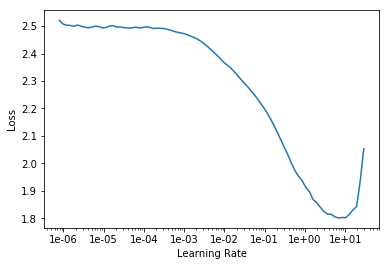

In [86]:
learn.recorder.plot()

In [87]:
learn.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy
1,0.222763,0.351808,0.891500
2,0.127642,0.105053,0.968500
3,0.079186,0.041144,0.987400


### Refactor

In [88]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [96]:
conv_layer??

In [90]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [91]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [92]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy
1,0.231119,0.200869,0.941000
2,0.187983,0.384470,0.859600
3,0.167415,0.135285,0.960400
4,0.142896,0.762099,0.804900
5,0.120748,0.090886,0.970400
6,0.108821,0.148700,0.953300
7,0.091045,0.068606,0.978500
8,0.059132,0.035632,0.989600
9,0.048819,0.032339,0.989800
10,0.046647,0.031472,0.990000


In [94]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     72         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 16, 7, 7]      1152       True      
______________________________________________________________________
ReLU                 [128, 16, 7, 7]      0          False     
______________________________________________________________________
BatchNorm2d          [128, 16, 7, 7]      32         True      
______________________________________________________________________
Conv2d               [128, 32, 4, 4]      4608       True      
______________________________________________________________

## Refactor but keep bias

In [97]:
def conv2_withbias(ni,nf): return conv_layer(ni,nf,stride=2, bias=True)

In [98]:
model = nn.Sequential(
    conv2_withbias(1, 8),   # 14
    conv2_withbias(8, 16),  # 7
    conv2_withbias(16, 32), # 4
    conv2_withbias(32, 16), # 2
    conv2_withbias(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [99]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [100]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy
1,0.231194,0.283192,0.914900
2,0.186132,0.197856,0.936000
3,0.167446,0.187924,0.944800
4,0.142969,0.096832,0.969900
5,0.113079,0.298271,0.910500
6,0.101562,0.069891,0.977900
7,0.086563,0.055223,0.982900
8,0.063057,0.039406,0.988000
9,0.052120,0.027805,0.991700
10,0.044301,0.026364,0.991900


In [101]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     80         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 16, 7, 7]      1168       True      
______________________________________________________________________
ReLU                 [128, 16, 7, 7]      0          False     
______________________________________________________________________
BatchNorm2d          [128, 16, 7, 7]      32         True      
______________________________________________________________________
Conv2d               [128, 32, 4, 4]      4640       True      
______________________________________________________________

### Resnet-ish

In [102]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [4]:
doc(res_block)

In [121]:
def resblock(nf):
    return ResBlock(nf)

In [122]:
model = nn.Sequential(
    conv2(1, 8),
    resblock(8),
    conv2(8, 16),
    resblock(16),
    conv2(16, 32),
    resblock(32),
    conv2(32, 16),
    resblock(16),
    conv2(16, 10),
    Flatten()
)

In [123]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), resblock(nf))

In [124]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [125]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


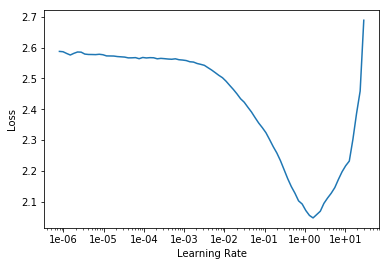

In [126]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [127]:
learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.238819,0.178719,0.951600
2,0.133718,0.107393,0.966800
3,0.120051,0.333066,0.905500
4,0.095810,0.075463,0.976700
5,0.081163,0.114026,0.964800
6,0.065133,0.106220,0.966000
7,0.057716,0.039721,0.987600
8,0.043807,0.041012,0.987100
9,0.031893,0.022970,0.992600
10,0.025938,0.020483,0.993600


In [128]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     72         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________

## fin